In [16]:
import numpy as np
import pandas as pd

import src.childs_draw as childs_draw

In [7]:
df = childs_draw.child_draw_describe(7557, 11, True)

In [8]:
df.head()

,X,Y,Pressure,TiltX,TiltY,Time,TimeDiff,PressureDiff,XDiff,YDiff,TiltXDiff,TiltYDiff
0,668.965008,642.160065,0.518547,3353.0,-759.0,3.473039,0.015717,0.031739,-1.211225,0.105324,0.0,0.0
1,667.753782,642.265389,0.550286,3353.0,-759.0,3.488755,0.015631,-0.011475,-2.001155,-1.158563,0.0,0.0
2,665.752627,641.106825,0.538811,3353.0,-759.0,3.504387,0.015597,0.021485,-0.526620,-1.000577,0.0,0.0
3,665.226008,640.106248,0.560296,3353.0,-759.0,3.519983,0.015545,0.036378,-0.737268,-2.633099,0.0,0.0
4,664.488740,637.473149,0.596674,3353.0,-759.0,3.535528,0.015730,0.011475,-0.421296,-3.739000,0.0,0.0


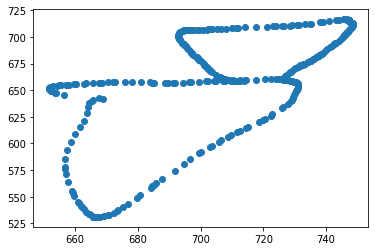

In [120]:
plt.scatter(df['X'], df['Y'])

In [32]:
limits = [df.head(1).index[0], df.tail(1).index[0]] + df[df.TimeDiff > df.TimeDiff.std()].index.tolist()
limits = np.unique(list(sorted(limits))).tolist()
limits

[0, 166, 367]

In [39]:
index = 0
for i in range(len(limits) - 1):
    start = limits[i]
    end = limits[i+1]
    
    sub_df = df.iloc[start:end]
    break

In [127]:
BLOCK = 5

counter = 0
values = []

for i in sub_df.index:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        deg = math.degrees(math.atan(y1/x1))
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += math.degrees(math.atan(y2/y1)) - deg
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg
        
        a = a/BLOCK
        b = b/(2 * BLOCK)
        
        if abs(b - a) > 2:
            counter += 1
        
        values.append(abs(b - a))


(counter, np.array(values).max())

(38, 2.619094892588523)

In [117]:
import matplotlib.pyplot as plt

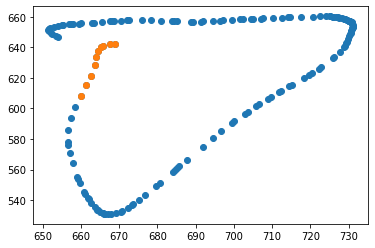

In [125]:
plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sub_df.iloc[:10]['X'], sub_df.iloc[:10]['Y'])

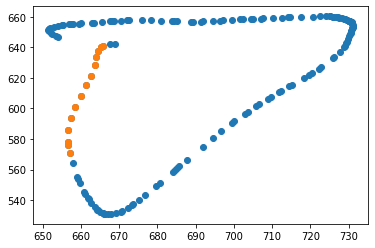

In [157]:
BLOCK = 5

counter = 0
values = []
sx = []
sy = []

for i in sub_df.index:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        deg = math.degrees(math.atan(y1/x1))
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += math.degrees(math.atan(y2/x1)) - deg
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg
        
        a = a/BLOCK
        b = b/(2 * BLOCK)
        
        if abs(b - a) > 0.5:
            counter += 1
            sx.append(x1)
            sy.append(y1)
        
        values.append(abs(b - a))

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)

,0,1
0,0.049124,-0.003390
1,0.015469,-0.064015
2,-0.043457,-0.148587
3,-0.107570,-0.214089
4,-0.168876,-0.274263
...,...,...
155,0.013874,0.003080
156,-0.001519,-0.010788
157,-0.011556,-0.031656
158,-0.013119,-0.034765


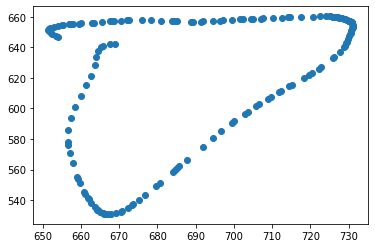

In [160]:
BLOCK = 3

counter = 0
values = []
sx = []
sy = []

for i in sub_df.index:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        deg = math.degrees(math.atan(y1/x1))
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += math.degrees(math.atan(y2/x2)) - deg
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg
        
        a = a/BLOCK
        b = b/(2*BLOCK)
        
        if abs(b - a) > 0.5:
            counter += 1
            sx.append(x1)
            sy.append(y1)
        
        values.append([a,b])

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)
counter
values = np.array(values)
pd.DataFrame(values)

4

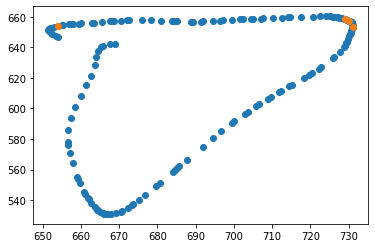

In [190]:
BLOCK = 5

counter = 0
values = []
sx = []
sy = []

def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

i = sub_df.head(1).index[0]
while i < sub_df.tail(2 * BLOCK).index[0]:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += get_angle(x1, y1, x2, y2)
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += get_angle(x1, y1, x2, y2)
        
        a = a/BLOCK
        b = b/(2*BLOCK)
        
        if abs(b - a) > 10:
            counter += 1
            sx.append(x1)
            sy.append(y1)
            
        values.append([a,b])
    
    i += BLOCK

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)

pd.DataFrame(np.array(values))

counter

0

int